## Data Acquisition

Install library pandas untuk proses manipulasi data

In [1]:
import pandas as pd

Mengunduh seluruh dataset yang diperlukan

In [4]:
test = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/application_test.csv')
train = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/application_train.csv')
bureau = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/bureau.csv')
bureau_balance = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/bureau_balance.csv')
credit_card_balance = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/credit_card_balance.csv')
installments_payments = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/installments_payments.csv')
POS_CASH_balance = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/POS_CASH_balance.csv')
previous_application = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/previous_application.csv')
sample_submission = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/home-credit/sample_submission.csv')

In [5]:
print(len(test.columns))
print(len(train.columns))

121
122


In [6]:
test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

In [10]:
for i in train.columns.values:
    if i not in test.columns.values:
        print(i)

TARGET


In [11]:
train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [19]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [13]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [14]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [15]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [17]:
POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [18]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [30]:
for i in train.columns:
    print(i, train[i].nunique())

SK_ID_CURR 307511
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13672
AMT_GOODS_PRICE 1002
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 62
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 17
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114584
EXT_SOURCE_2 119831
EXT_SOURCE_3 814
APARTMENTS_AVG 2339
BASEMENTAREA_AVG 3780
YEARS_BEGINEXPLUATATION_AVG 285
YEARS_BUILD_AVG 149
COMMONARE

In [31]:
for i in train.columns:
    print(i, train[i].dtype)

SK_ID_CURR int64
TARGET int64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EXT_SOUR

In [32]:
train['CODE_GENDER']

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

## Data Pre-processing

**Check Missing Values**

In [22]:
len(train)

307511

In [33]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [23]:
len(test)

48744

In [21]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [24]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [25]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [26]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [27]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [28]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [29]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

**Feature Encoding**

Pada tahapan ini, strategi yang digunakan adalah menggunakan Label Encoder untuk mengubah fitur dengan tipe data *object* menjadi *integer*. Penggunaan Label Encoder tidak menambah jumlah kolom (tidak seperti One-Hot Encoder) sehingga efisien pada kasus ini

In [6]:
from sklearn.preprocessing import LabelEncoder

dataset = [test, train, bureau, bureau_balance, credit_card_balance, installments_payments, POS_CASH_balance, previous_application]

label_encoder = LabelEncoder()

for i in dataset:
    for j in i.columns:
        if i[j].dtype == 'object':
            i[j] = label_encoder.fit_transform(i[j])        

**Missing Value Handling**

In [42]:
from scipy.stats import shapiro 
from scipy.stats import lognorm

dataset1 = [bureau, bureau_balance, credit_card_balance, installments_payments, POS_CASH_balance, previous_application]

dataset2 = [train, test]

for i in dataset1:
    for j in i.columns:
        if i[j].isnull().sum() >= len(i) / 2:
            i.drop(j, axis = 1, inplace = True)
        elif shapiro(i[j])[1] < 0.05:
            i[j].fillna(i[j].median(), inplace = True)
        else:
            i[j].fillna(i[j].mean(), inplace = True)

for i in dataset2:
    for j in i.columns:
        if shapiro(i[j])[1] < 0.05:
            i[j].fillna(i[j].median(), inplace = True)
        else:
            i[j].fillna(i[j].mean(), inplace = True)

/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate f

## Data Visualization

**Bar Plot**

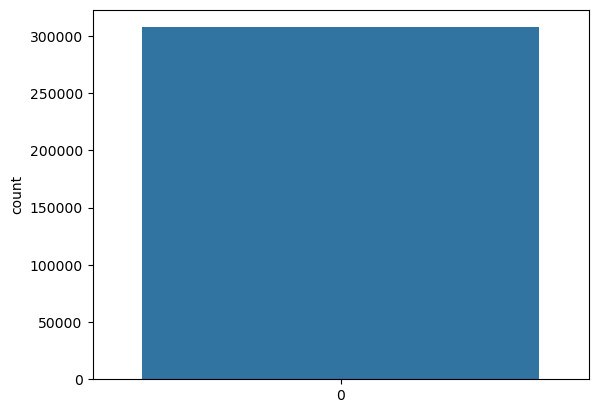

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['TARGET'])
plt.show()

**Heat Map**

NameError: name 'plt' is not defined

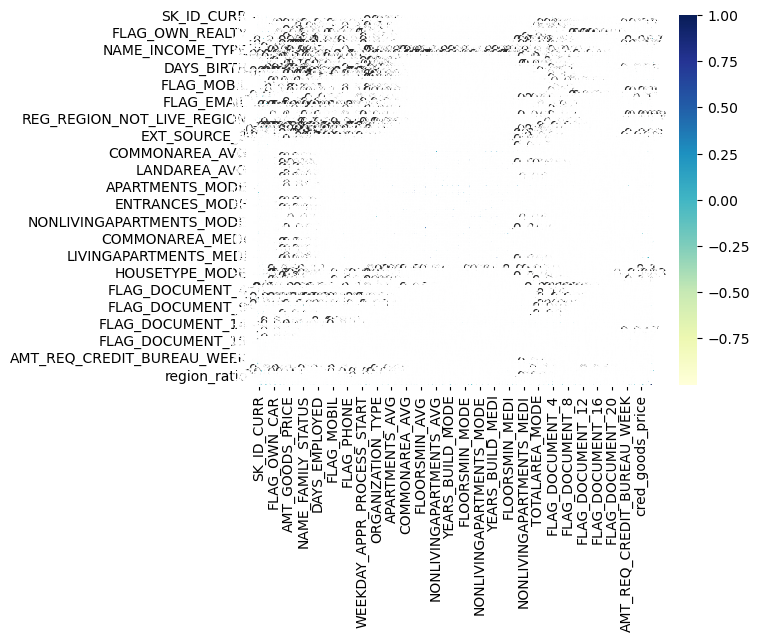

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt 

dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

In [67]:
train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,...,0.000509,0.000167,0.001073,0.000282,-0.002486,-0.002040,0.001953,0.000452,0.000954,0.004335
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,...,-0.007952,-0.001358,0.000215,0.003709,0.000848,0.002464,0.000718,-0.011356,-0.001842,0.018160
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241543,...,-0.007530,-0.005190,-0.007308,0.055821,0.000418,-0.004732,-0.014144,-0.013286,-0.020307,-0.048539
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.074728,0.021572,0.076960,...,0.022205,0.004632,0.003258,0.023908,0.002945,0.001055,-0.001454,0.008306,-0.006921,-0.016893
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141586,...,-0.000097,0.002184,0.007299,0.006741,0.002496,0.000535,0.000227,0.019149,-0.009291,-0.033988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002040,0.002464,-0.004732,0.001055,0.000535,-0.008645,-0.000342,0.002868,0.003964,0.002018,...,0.012675,0.001076,-0.000119,-0.001027,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.001953,0.000718,-0.014144,-0.001454,0.000227,0.006972,-0.002277,0.002326,-0.001192,0.012815,...,-0.004428,-0.001218,-0.001765,0.000074,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000452,-0.011356,-0.013286,0.008306,0.019149,-0.004180,-0.010101,0.024063,0.050934,0.036148,...,-0.001493,-0.002607,0.001280,-0.003281,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.000954,-0.001842,-0.020307,-0.006921,-0.009291,0.014414,-0.007324,0.004734,0.014896,0.009348,...,-0.004891,-0.001505,-0.001007,-0.001821,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


**Scatter Plot**

In [80]:
for i in train.columns:
    for j in train.columns:
        if train[i].corr(train[j]) > 0.5 and i != j:
            print(i, j, train[i].corr(train[j]))

AMT_CREDIT AMT_ANNUITY 0.7701265817644214
AMT_ANNUITY AMT_CREDIT 0.7701265817644214
DAYS_BIRTH FLAG_EMP_PHONE 0.619887696202353
DAYS_EMPLOYED OCCUPATION_TYPE 0.5486999742974888
DAYS_EMPLOYED ORGANIZATION_TYPE 0.6304793258981816
DAYS_EMPLOYED FLAG_DOCUMENT_6 0.5974844373735059
FLAG_EMP_PHONE DAYS_BIRTH 0.619887696202353
OCCUPATION_TYPE DAYS_EMPLOYED 0.5486999742974888
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION 0.8606267802832693
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION 0.8606267802832693
REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY 0.8255747229688973
LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.8255747229688972
ORGANIZATION_TYPE DAYS_EMPLOYED 0.6304793258981816
YEARS_BEGINEXPLUATATION_AVG YEARS_BEGINEXPLUATATION_MODE 0.9718933677077903
YEARS_BEGINEXPLUATATION_AVG YEARS_BEGINEXPLUATATION_MEDI 0.9938254172943544
FLOORSMAX_AVG FLOORSMAX_MODE 0.9856894240021485
FLOORSMAX_AVG FLOORSMAX_MEDI 0.9970341420349668
FLOORSMAX_AVG TOTALAREA_MODE 0.6246458458475773
YEA

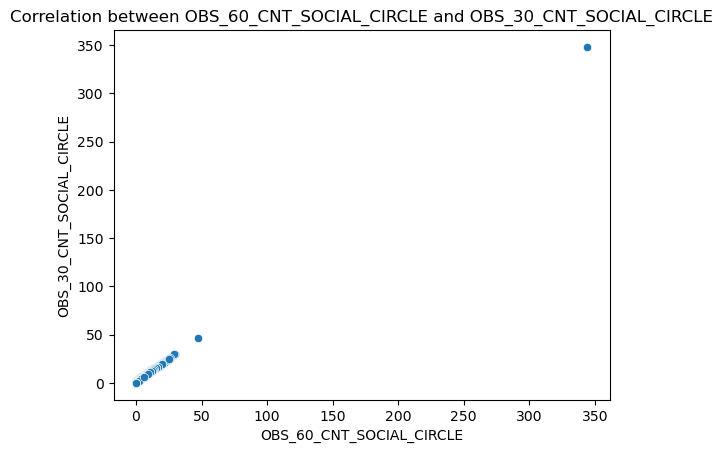

In [75]:
sns.scatterplot(x = 'OBS_60_CNT_SOCIAL_CIRCLE', y = 'OBS_30_CNT_SOCIAL_CIRCLE', data = train)
x = 'OBS_60_CNT_SOCIAL_CIRCLE'
y = 'OBS_30_CNT_SOCIAL_CIRCLE'
plt.title(f"Correlation between {x} and {y}")
plt.show()

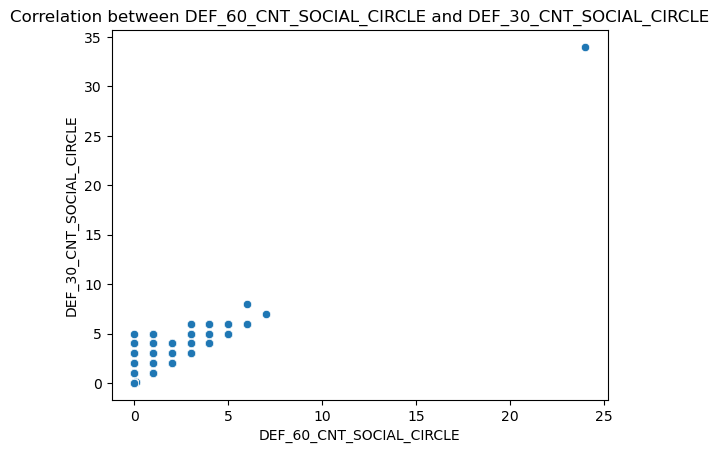

In [76]:
sns.scatterplot(x = 'DEF_60_CNT_SOCIAL_CIRCLE', y = 'DEF_30_CNT_SOCIAL_CIRCLE', data = train)
x = 'DEF_60_CNT_SOCIAL_CIRCLE'
y = 'DEF_30_CNT_SOCIAL_CIRCLE'
plt.title(f"Correlation between {x} and {y}")
plt.show()

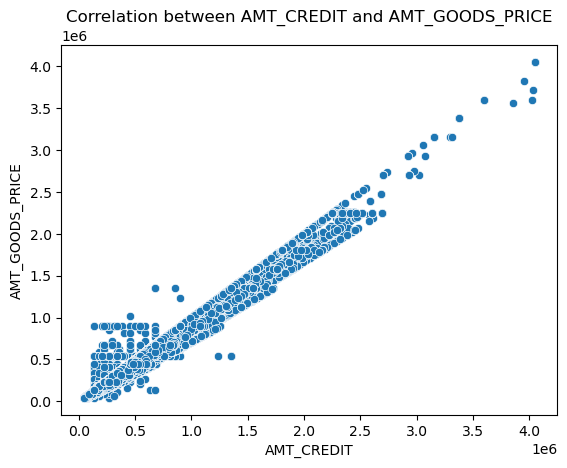

In [77]:
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = train)
x = 'AMT_CREDIT'
y = 'AMT_GOODS_PRICE'
plt.title(f"Correlation between {x} and {y}")
plt.show()

**Create and Drop Features**

In [43]:
dataset = [train, test]

for i in dataset:
    i['cred_goods_price'] = i['AMT_CREDIT']/i['AMT_GOODS_PRICE']
    i['cred_goods_price'] = i['cred_goods_price'].fillna(i['cred_goods_price'].mean())
    i['region_ratio'] = i['REGION_RATING_CLIENT'] / i['REGION_RATING_CLIENT_W_CITY']
    i['region_ratio'] = i['region_ratio'].fillna(i['region_ratio'].mean())
    i['OBS_30_60_avg'] = (i['OBS_30_CNT_SOCIAL_CIRCLE'] + i['OBS_60_CNT_SOCIAL_CIRCLE'])/2
    i['DEF_30_60_avg'] = (i['DEF_30_CNT_SOCIAL_CIRCLE'] + i['DEF_60_CNT_SOCIAL_CIRCLE'])/2
    i.drop(['SK_ID_CURR','CNT_CHILDREN', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
            'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
            'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'WALLSMATERIAL_MODE',
            'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
            'DEF_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)

In [30]:
len(test.columns)

107

In [31]:
len(train.columns)

108

**Feature Scaling**

In [44]:
from sklearn.preprocessing import RobustScaler

train_robust = RobustScaler().fit_transform(train)
test_robust = RobustScaler().fit_transform(test)

In [34]:
train.shape

(307511, 108)

In [35]:
test.shape

(48744, 107)

## Machine Learning Implementation

**Train-test Split and Undersampling**

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = train.drop('TARGET', axis = 1)
y = train['TARGET']
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**XG Boost**

In [46]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.3 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Accuracy : 0.9194998617953596


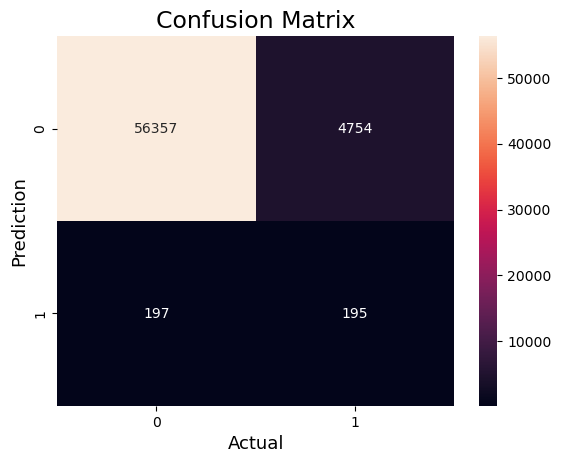

In [57]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Random Forest**

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Accuracy : 0.9195486399037446


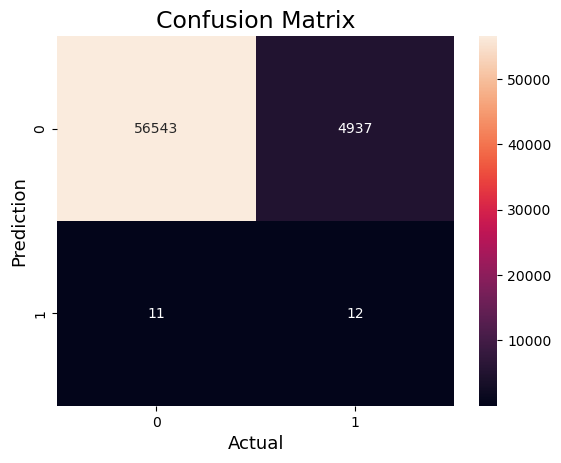

In [59]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Logistic Regression**

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Accuracy : 0.9195323805342829


/Users/whs9801/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


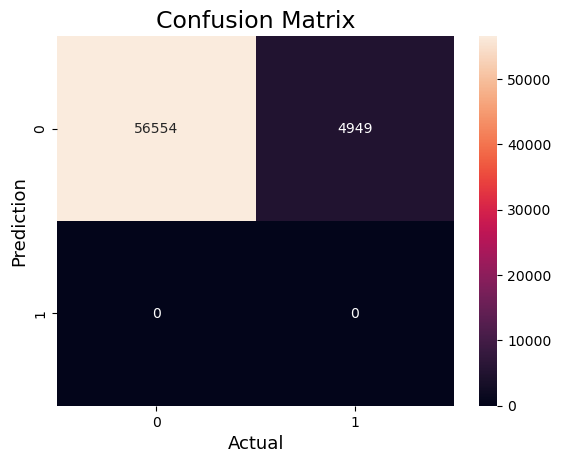

In [61]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**CatBoost Classifier**

In [53]:
pip install catboost

  Using cached catboost-1.2.3-cp310-cp310-macosx_11_0_universal2.whl.metadata (1.2 kB)
Using cached catboost-1.2.3-cp310-cp310-macosx_11_0_universal2.whl (26.2 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Learning rate set to 0.108111
0:	learn: 0.5863162	total: 49.3ms	remaining: 49.2s
1:	learn: 0.5071959	total: 91.7ms	remaining: 45.7s
2:	learn: 0.4494288	total: 137ms	remaining: 45.4s
3:	learn: 0.4044270	total: 188ms	remaining: 46.8s
4:	learn: 0.3692381	total: 241ms	remaining: 47.9s
5:	learn: 0.3424442	total: 299ms	remaining: 49.5s
6:	learn: 0.3244257	total: 348ms	remaining: 49.4s
7:	learn: 0.3098168	total: 398ms	remaining: 49.4s
8:	learn: 0.2971142	total: 448ms	remaining: 49.3s
9:	learn: 0.2879345	total: 496ms	remaining: 49.1s
10:	learn: 0.2810407	total: 539ms	remaining: 48.4s
11:	learn: 0.2755021	total: 582ms	remaining: 47.9s
12:	learn: 0.2711830	total: 625ms	remaining: 47.5s
13:	learn: 0.2682751	total: 669ms	remaining: 47.1s
14:	learn: 0.2654241	total: 711ms	remaining: 46.7s
15:	learn: 0.2628816	total: 757ms	remaining: 46.6s
16:	learn: 0.2607390	total: 802ms	remaining: 46.4s
17:	learn: 0.2590868	total: 888ms	remaining: 48.4s
18:	learn: 0.2577163	total: 942ms	remaining: 48.6s
19:	learn

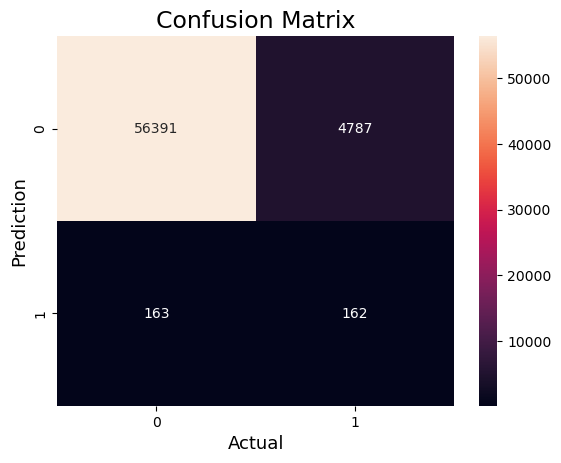

In [63]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Prediction and Submission

In [64]:
model = RandomForestClassifier()

model.fit(X, y)
predict_test = model.predict(test)
submission = pd.DataFrame({'SK_ID_CURR': sample_submission['SK_ID_CURR'], 'TARGET': predict_test})
submission.to_csv('submission.csv', index=False)